## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import normaltest

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

## Pre-processing

In [2]:
csv_path = '../data/household_data_60min_singleindex.csv'

df = pd.read_csv(csv_path, parse_dates=['utc_timestamp', 'cet_cest_timestamp'], index_col='utc_timestamp')
print('input data: ', df.shape)
#residential building in suburban area
columns_to_drop = [col for col in df.columns if not col.startswith('DE_KN_residential2')]

# Clear data
df = df.drop(columns= columns_to_drop)
df = df.dropna(how='all')

#Data shape and sample
print(f'Data shape after droping NaN {df.shape}')
df.head()

input data:  (38454, 70)
Data shape after droping NaN (24948, 5)


,DE_KN_residential2_circulation_pump,DE_KN_residential2_dishwasher,DE_KN_residential2_freezer,DE_KN_residential2_grid_import,DE_KN_residential2_washing_machine
utc_timestamp,,,,,
2015-04-01 08:00:00+00:00,0.045,NaN,NaN,NaN,NaN
2015-04-01 09:00:00+00:00,0.120,NaN,NaN,NaN,NaN
2015-04-01 10:00:00+00:00,0.209,NaN,NaN,NaN,NaN
2015-04-01 11:00:00+00:00,0.337,NaN,NaN,NaN,NaN
2015-04-01 12:00:00+00:00,0.374,NaN,NaN,NaN,NaN


## Processing data

In [3]:
df.describe()

,DE_KN_residential2_circulation_pump,DE_KN_residential2_dishwasher,DE_KN_residential2_freezer,DE_KN_residential2_grid_import,DE_KN_residential2_washing_machine
count,19823.000000,19134.000000,10251.000000,15798.000000,24733.000000
mean,408.500037,257.683142,70.825802,2017.480739,192.611891
std,267.120269,172.538958,40.784379,1276.756154,129.810820
min,0.045000,0.000000,0.000000,0.070000,0.000000
25%,130.167000,109.456000,34.940000,843.162250,76.808000
50%,447.998000,243.549500,72.539000,1988.988000,174.098000
75%,595.986500,401.277750,106.251500,3055.799250,312.911000
max,868.885000,596.351000,140.505000,4495.448000,428.020000


### NaN values

In [4]:
df.isna().sum()

DE_KN_residential2_circulation_pump     5125
DE_KN_residential2_dishwasher           5814
DE_KN_residential2_freezer             14697
DE_KN_residential2_grid_import          9150
DE_KN_residential2_washing_machine       215
dtype: int64

In [5]:
df = df.diff().fillna(0)
df.head()

,DE_KN_residential2_circulation_pump,DE_KN_residential2_dishwasher,DE_KN_residential2_freezer,DE_KN_residential2_grid_import,DE_KN_residential2_washing_machine
utc_timestamp,,,,,
2015-04-01 08:00:00+00:00,0.000,0.0,0.0,0.0,0.0
2015-04-01 09:00:00+00:00,0.075,0.0,0.0,0.0,0.0
2015-04-01 10:00:00+00:00,0.089,0.0,0.0,0.0,0.0
2015-04-01 11:00:00+00:00,0.128,0.0,0.0,0.0,0.0
2015-04-01 12:00:00+00:00,0.037,0.0,0.0,0.0,0.0


In [6]:
daily_usage_filtered = []
K = 2 #standard deviations

for column_name in df:
    mean = df[column_name].mean()
    std_dev = df[column_name].std()

    # Define a range for normal values
    lower_bound = mean - K * std_dev
    upper_bound = mean + K * std_dev

    # Filter out values outside the normal range
    df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

In [7]:
grid_import = df['DE_KN_residential2_grid_import']

df = df.drop(columns= 'DE_KN_residential2_grid_import')

In [8]:
df['sum'] = df.sum(axis=1, numeric_only=True)
df.head()

,DE_KN_residential2_circulation_pump,DE_KN_residential2_dishwasher,DE_KN_residential2_freezer,DE_KN_residential2_washing_machine,sum
utc_timestamp,,,,,
2015-04-01 08:00:00+00:00,0.000,0.0,0.0,0.0,0.000
2015-04-01 09:00:00+00:00,0.075,0.0,0.0,0.0,0.075
2015-04-01 10:00:00+00:00,0.089,0.0,0.0,0.0,0.089
2015-04-01 12:00:00+00:00,0.037,0.0,0.0,0.0,0.037
2015-04-01 13:00:00+00:00,0.006,0.0,0.0,0.0,0.006


## Graphs

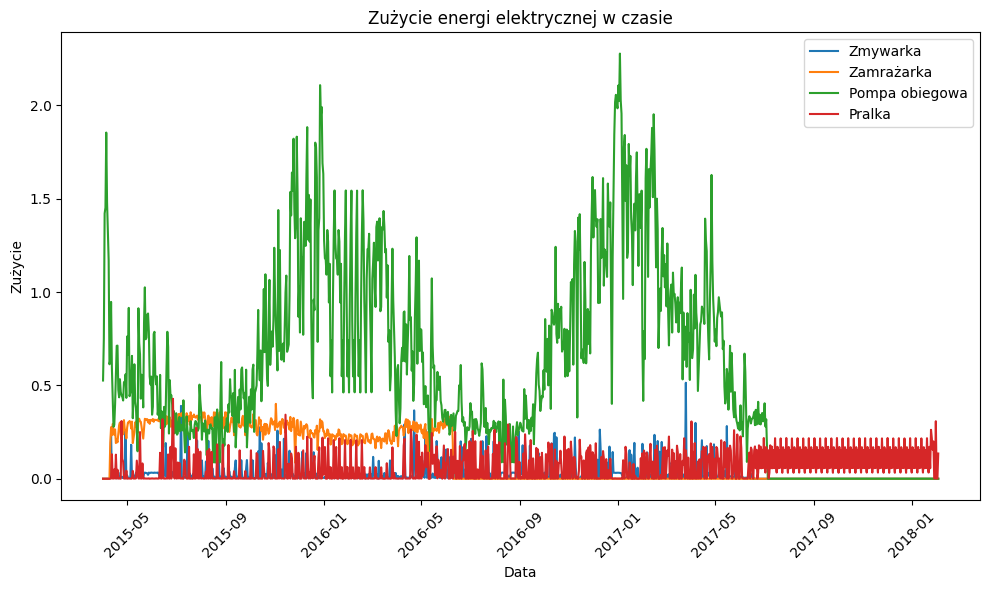

In [9]:
# Energy consumption plot
df_daily_sum = df.resample('D').sum()
plt.figure(figsize=(10, 6))

plt.plot(df_daily_sum.index, df_daily_sum['DE_KN_residential2_dishwasher'], label='Zmywarka')
plt.plot(df_daily_sum.index, df_daily_sum['DE_KN_residential2_freezer'], label='Zamrażarka')
plt.plot(df_daily_sum.index, df_daily_sum['DE_KN_residential2_circulation_pump'], label='Pompa obiegowa')
plt.plot(df_daily_sum.index, df_daily_sum['DE_KN_residential2_washing_machine'], label='Pralka')

plt.xlabel('Data')
plt.ylabel('Zużycie')
plt.title('Zużycie energi elektrycznej w czasie')

plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
df_daily_sum.shape

(1040, 5)

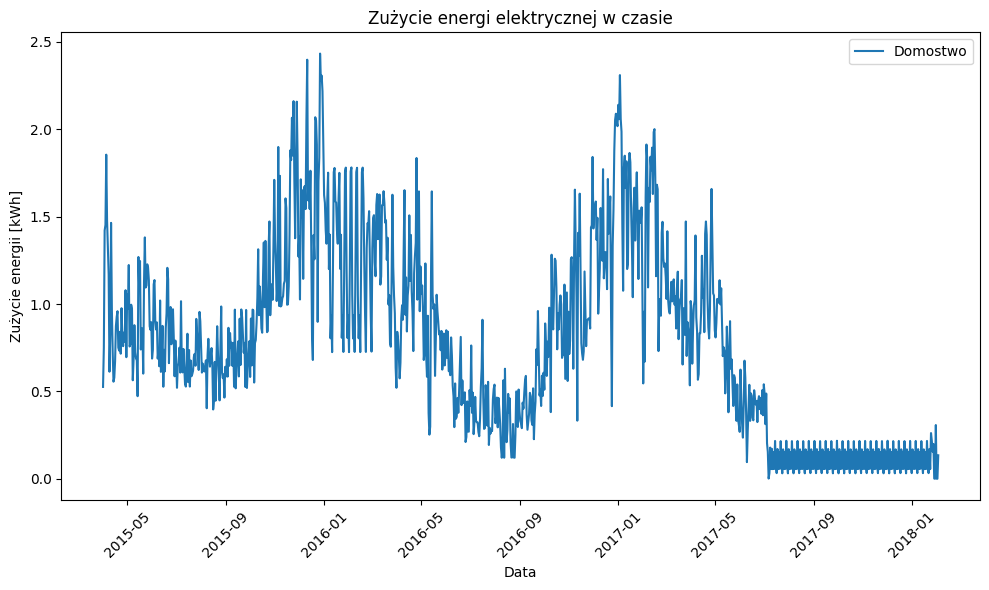

In [11]:
# Sum energy consumption plot
plt.figure(figsize=(10, 6))

plt.plot(df_daily_sum.index, df_daily_sum['sum'], label='Domostwo')

plt.xlabel('Data')
plt.ylabel('Zużycie energii [kWh]')
plt.title('Zużycie energi elektrycznej w czasie')

plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
correlation_matrix = df.corr()
correlation_matrix.head()

,DE_KN_residential2_circulation_pump,DE_KN_residential2_dishwasher,DE_KN_residential2_freezer,DE_KN_residential2_washing_machine,sum
DE_KN_residential2_circulation_pump,1.000000,0.031908,0.118372,0.011949,0.879558
DE_KN_residential2_dishwasher,0.031908,1.000000,0.018371,0.008101,0.285842
DE_KN_residential2_freezer,0.118372,0.018371,1.000000,-0.049092,0.248724
DE_KN_residential2_washing_machine,0.011949,0.008101,-0.049092,1.000000,0.378561
sum,0.879558,0.285842,0.248724,0.378561,1.000000


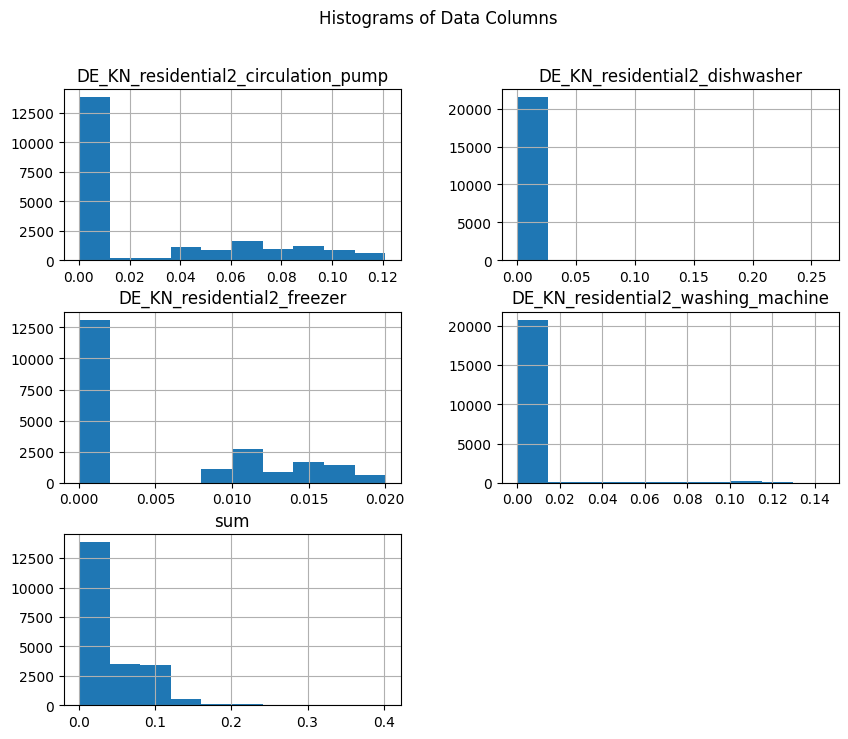

In [13]:
df.hist(figsize=(10, 8))
plt.suptitle('Histograms of Data Columns')
plt.show()

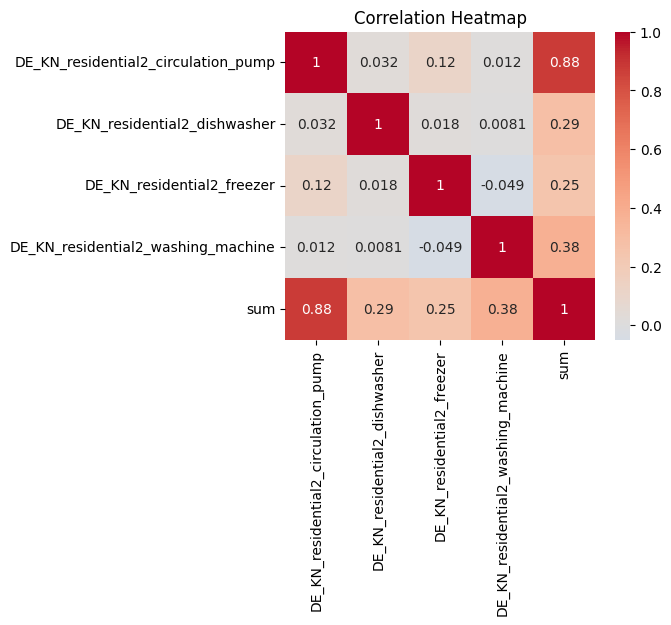

In [14]:
# Create heatmap correlation matrix 
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

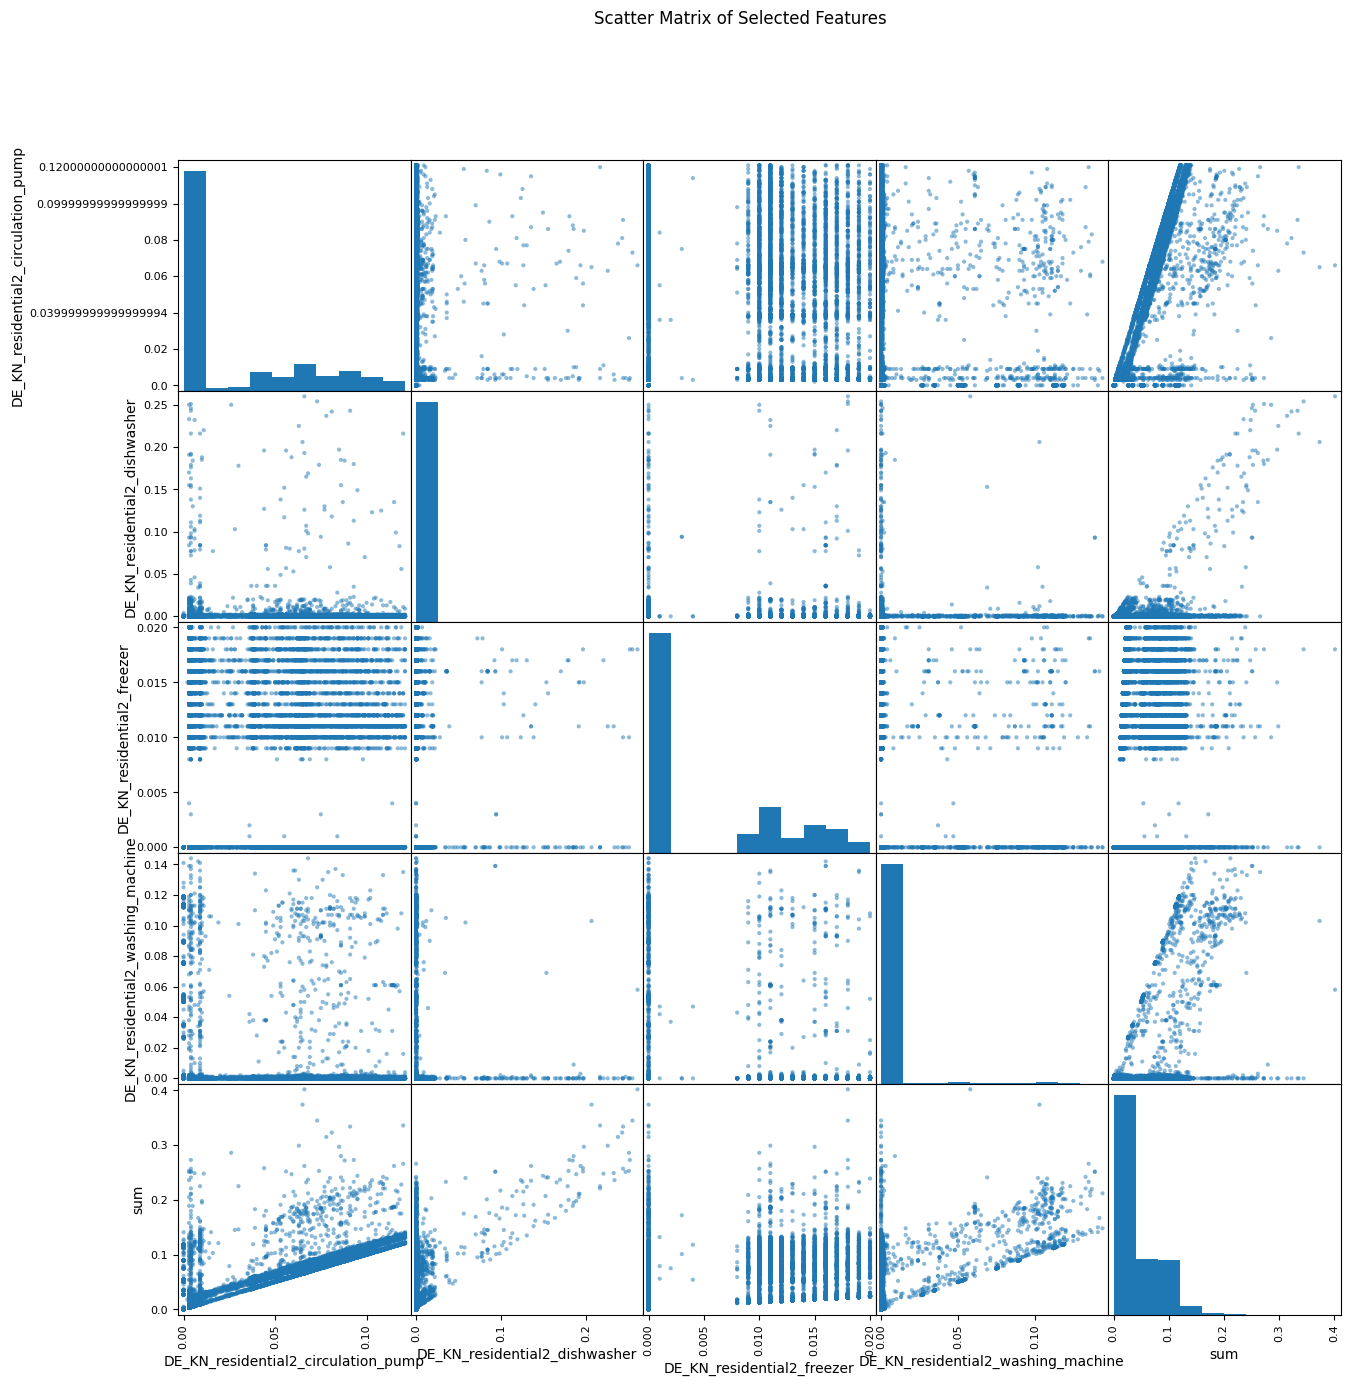

In [15]:
# Correlation matrix using scatter_matrix
scatter_matrix(df[['DE_KN_residential2_circulation_pump','DE_KN_residential2_dishwasher','DE_KN_residential2_freezer','DE_KN_residential2_washing_machine','sum']], figsize=(15, 15))
plt.suptitle('Scatter Matrix of Selected Features')
plt.show()

## Split data 

In [16]:
df = pd.DataFrame(df_daily_sum)

# Prepare features and target
features = (df.index.astype(np.int64) // 10**9).values.reshape(-1,1)

#features = grid_import.values.reshape(-1,1)
target = df['sum']

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=11)


## LinearRegression model

In [17]:


# Create Linear Regression model
model_LR = LinearRegression()

# Train the model on the training data
model_LR.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model_LR.predict(X_test)


In [18]:
#Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error: {:.2f}'.format(mse))

# Obliczanie Root Mean Squared Error
rmse = np.sqrt(mse)
print('Root Mean Squared Error: {:.2f}'.format(rmse))

# Obliczanie Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error: {:.2f}'.format(mae))

# Obliczanie Coefficient of Determination (R^2)
r2 = r2_score(y_test, y_pred)
print('Coefficient of Determination (R^2): {:.2f}'.format(r2))

Mean Squared Error: 0.24
Root Mean Squared Error: 0.49
Mean Absolute Error: 0.40
Coefficient of Determination (R^2): 0.23


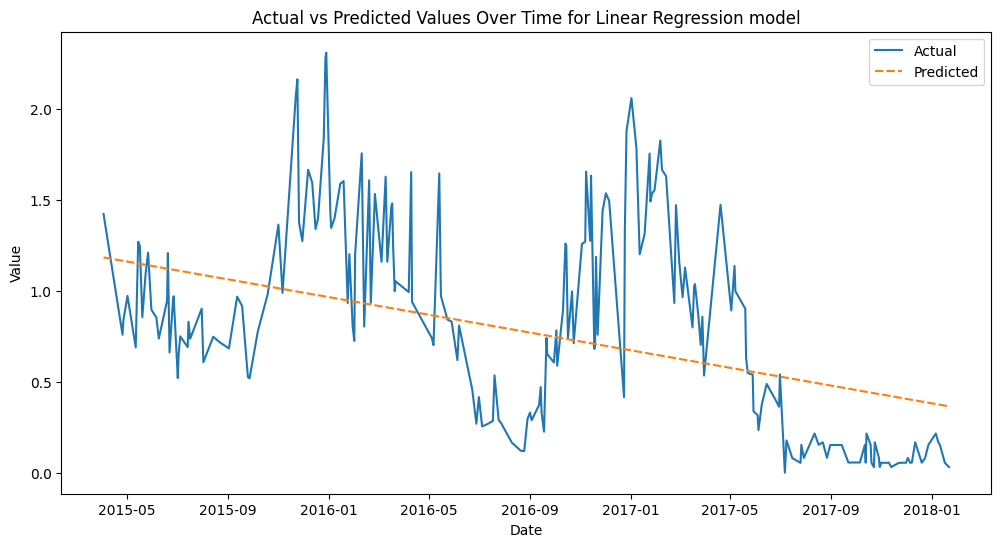

In [19]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
plt.figure(figsize=(12, 6))
sns.lineplot(data=results_df)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values Over Time for Linear Regression model')
plt.legend()
plt.show()

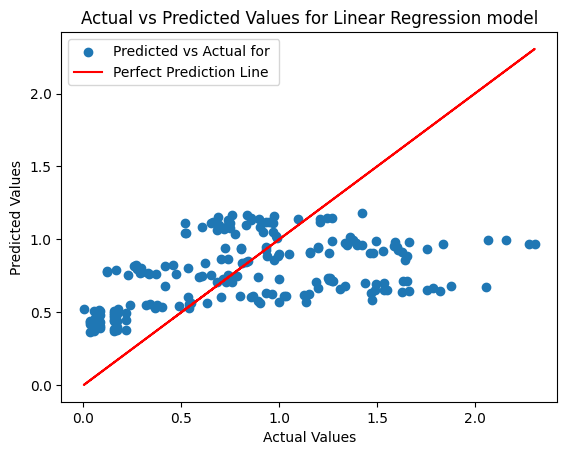

In [20]:
plt.scatter(y_test, y_pred, label='Predicted vs Actual for ')
plt.plot(y_test, y_test, color='r', label='Perfect Prediction Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Linear Regression model')
plt.legend()
plt.show()

## DecisionTreeRegressor Model

In [21]:
model_tree = DecisionTreeRegressor(max_depth=9)  # You can adjust hyperparameters like max_depth
model_tree.fit(X_train, y_train)
y_pred = model_tree.predict(X_test)

In [22]:
#Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error: {:.2f}'.format(mse))

# Obliczanie Root Mean Squared Error
rmse = np.sqrt(mse)
print('Root Mean Squared Error: {:.2f}'.format(rmse))

# Obliczanie Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error: {:.2f}'.format(mae))

# Obliczanie Coefficient of Determination (R^2)
r2 = r2_score(y_test, y_pred)
print('Coefficient of Determination (R^2): {:.2f}'.format(r2))

Mean Squared Error: 0.06
Root Mean Squared Error: 0.24
Mean Absolute Error: 0.18
Coefficient of Determination (R^2): 0.81


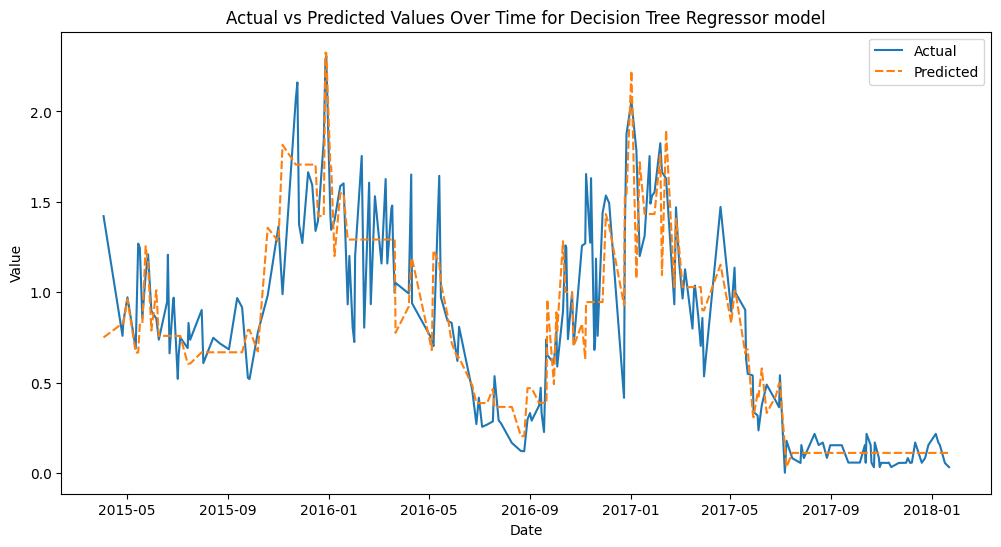

In [23]:
y_pred = model_tree.predict(X_test)
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
plt.figure(figsize=(12, 6))
sns.lineplot(data=results_df)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values Over Time for Decision Tree Regressor model')
plt.legend()
plt.show()

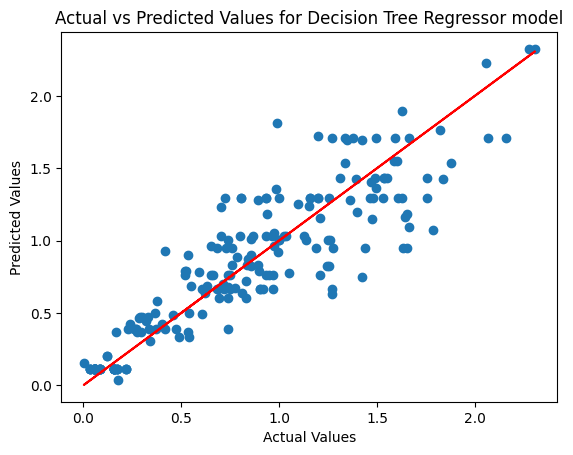

In [24]:
plt.scatter(y_test, y_pred, label='Predicted vs Actual')
plt.plot(y_test, y_test, color='r', label='Perfect Prediction Line')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Decision Tree Regressor model')
plt.show()

## RandomForestRegressor Model

In [25]:
model_rfr = RandomForestRegressor(n_estimators=100, random_state=100)

model_rfr.fit(X_train, y_train)
print(f'R^2: {model_rfr.score(X_test,y_test)}')

y_pred = model_rfr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

R^2: 0.8370745241573972
Mean Squared Error: 0.050561602616825026


In [26]:
#Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error: {:.2f}'.format(mse))

# Obliczanie Root Mean Squared Error
rmse = np.sqrt(mse)
print('Root Mean Squared Error: {:.2f}'.format(rmse))

# Obliczanie Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error: {:.2f}'.format(mae))

# Obliczanie Coefficient of Determination (R^2)
r2 = r2_score(y_test, y_pred)
print('Coefficient of Determination (R^2): {:.2f}'.format(r2))

Mean Squared Error: 0.05
Root Mean Squared Error: 0.22
Mean Absolute Error: 0.17
Coefficient of Determination (R^2): 0.84


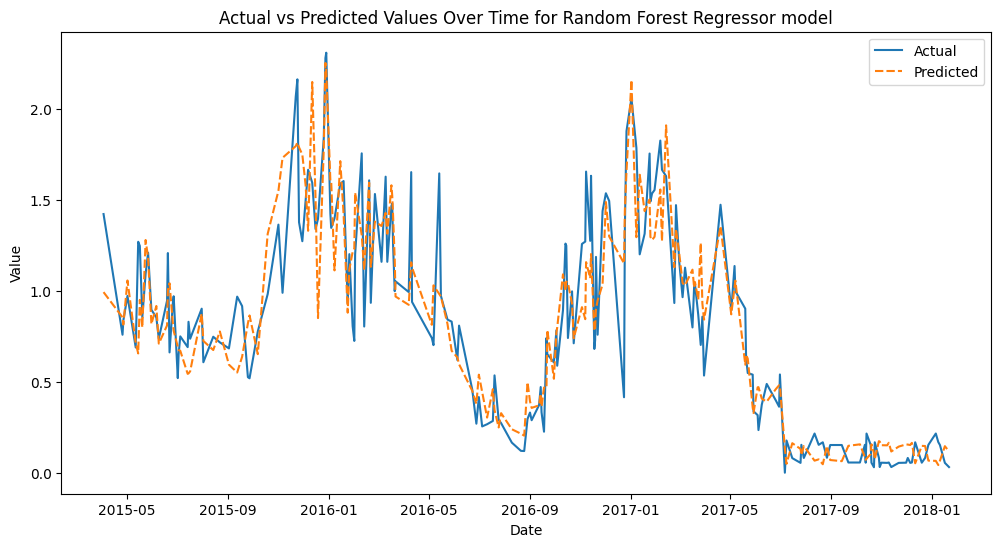

In [27]:
y_pred = model_rfr.predict(X_test)
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
plt.figure(figsize=(12, 6))
sns.lineplot(data=results_df)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values Over Time for Random Forest Regressor model')
plt.legend()
plt.show()

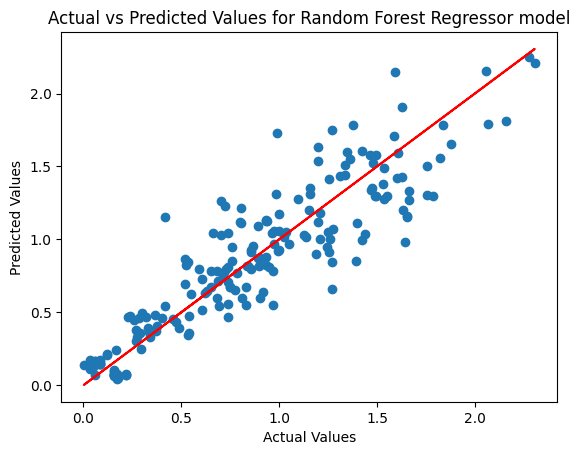

In [28]:
plt.scatter(y_test, y_pred, label='Predicted vs Actual')
plt.plot(y_test, y_test, color='r', label='Perfect Prediction Line')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Random Forest Regressor model')
plt.show()

## GaussianProcessRegressor Model

In [29]:
# Prepare features and target
features = (df.index.astype(np.int64) // 10**9).values.reshape(-1,1)

#features = grid_import.values.reshape(-1,1)
target = df['sum']

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=11)


In [30]:
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic

kernel_rbf = RBF(length_scale=1.0)
model_rbf = GaussianProcessRegressor(kernel=kernel_rbf, n_restarts_optimizer=10)
model_rbf.fit(X_train, y_train)
y_pred_rbf = model_rbf.predict(X_test)

In [31]:
#Mean Squared Error
mse = mean_squared_error(y_test, y_pred_rbf)
print('Mean Squared Error: {:.2f}'.format(mse))

# Obliczanie Root Mean Squared Error
rmse = np.sqrt(mse)
print('Root Mean Squared Error: {:.2f}'.format(rmse))

# Obliczanie Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred_rbf)
print('Mean Absolute Error: {:.2f}'.format(mae))

# Obliczanie Coefficient of Determination (R^2)
r2 = r2_score(y_test, y_pred_rbf)
print('Coefficient of Determination (R^2): {:.2f}'.format(r2))

Mean Squared Error: 0.98
Root Mean Squared Error: 0.99
Mean Absolute Error: 0.82
Coefficient of Determination (R^2): -2.16


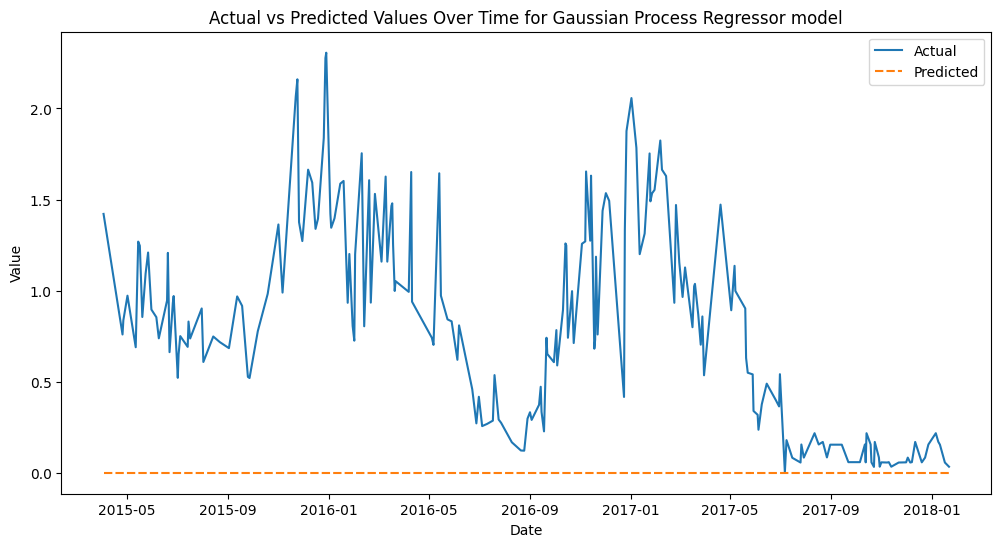

In [32]:
y_pred = model_rbf.predict(X_test)
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
plt.figure(figsize=(12, 6))
sns.lineplot(data=results_df)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values Over Time for Gaussian Process Regressor model')
plt.legend()
plt.show()

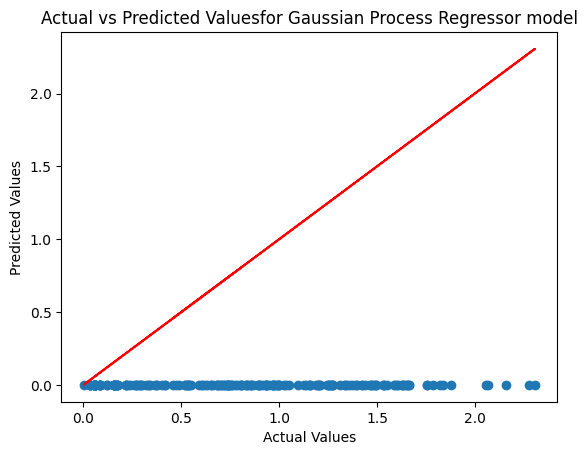

In [33]:
plt.scatter(y_test, y_pred, label='Predicted vs Actual')
plt.plot(y_test, y_test, color='r', label='Perfect Prediction Line')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Valuesfor Gaussian Process Regressor model')
plt.show()